In [52]:
!pip install numpy
!pip install pandas
!pip install scikit-learn


[notice] A new release of pip is available: 23.1 -> 23.1.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.1 -> 23.1.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.1 -> 23.1.1
[notice] To update, run: pip install --upgrade pip


In [53]:
# load packages 
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import seaborn as sns
from sklearn.metrics import r2_score 
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
import warnings
warnings.filterwarnings('ignore')

In [54]:
# Import the data
fname = "2022_Test_ML.csv"
fname = os.path.join('/media/igofed/SSD_2T/DATASETS/Huawei', fname)
df = pd.read_csv(fname, sep=',')

## 1.a Analyze data to understand the dataset quality and properties of the target functions
* We can see 4 numerical float variables, 500 values in a column.

In [55]:
print("We have 4 features to predict two response variables")
print("Ranges of variations:")
print(f"s_mt \t[min: {np.min(df['s_mt'])}, max: {np.max(df['s_mt'])}]")
print(f"s_mq \t[min: {np.min(df['s_mq'])}, max: {np.max(df['s_mq'])}]")
print(f"d \t[min: {np.min(df['d'])}, max: {np.max(df['d'])}]")
print(f"h_p \t[min: {np.min(df['h_p'])}, max: {np.max(df['h_p'])}]")
#########################################
features=['ind', 's_mt', 's_mq', 'd', 'h_p', 'QW', 'DP']
R2, RMS = [], []
df.info()

We have 4 features to predict two response variables
Ranges of variations:
s_mt 	[min: 0.8, max: 2.7]
s_mq 	[min: 0.8, max: 2.1]
d 	[min: 1.0, max: 3.0]
h_p 	[min: 4.0, max: 10.0]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ind     500 non-null    int64  
 1   s_mt    500 non-null    float64
 2   s_mq    500 non-null    float64
 3   d       500 non-null    float64
 4   h_p     500 non-null    float64
 5   QW      500 non-null    float64
 6   DP      500 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 27.5 KB


* All numbers in each column are unique.

In [166]:
print('Check if numbers are unique:')
for i in features[1:]:
    print(f'Unique numbers: {len(df[i].unique())}' )

Check if numbers are unique:
Unique numbers: 500
Unique numbers: 500
Unique numbers: 500
Unique numbers: 500
Unique numbers: 500
Unique numbers: 500


In [161]:
# Missing parameters
df.isnull().sum()

ind     0
s_mt    0
s_mq    0
d       0
h_p     0
QW      0
DP      0
dtype: int64

In [167]:
def plot_hist(ax, data, title):
    mu = np.round(np.mean(data),2)
    sigma = np.std(data)
    min = np.round(np.min(data),2)
    max = np.round(np.max(data),2)
    n, bins, _ = ax.hist(data, bins=500)
    #y = norm.pdf (bins, mu, sigma)
    #ax.plot (bins, y, 'r--')
    ax.set_xlabel('Value')
    ax.set_ylabel('Count')
    #ax.set_yscale('log')
    ax.set_title(title)
    ax.axvline(x=(np.mean(data)), ls="--", color='r', alpha=0.7,label='Mean: ' + np.str(mu))
    ax.axvline(x=(np.min(data)), ls="--", color='k', alpha=0.7, label='Min: ' + str(min))
    ax.axvline(x=float(np.max(data)), ls="--", color='b', alpha=0.7, label='Max: ' + str(max))
    ax.legend()
    sns.set()
# estimate correlation coefficients
def correlation_matrix(df):
    df = df.drop(features[0], axis=1)
    pd.options.display.float_format = '{:,.4f}'.format
    corr_matrix = df.corr()
    return corr_matrix

,s_mt,s_mq,d,h_p,QW,DP
s_mt,1.0000,0.0028,-0.0025,0.0021,-0.0182,-0.0059
s_mq,0.0028,1.0000,0.0033,0.0023,-0.0287,-0.0078
d,-0.0025,0.0033,1.0000,-0.0037,0.4491,0.1894
h_p,0.0021,0.0023,-0.0037,1.0000,-0.6327,-0.8980
QW,-0.0182,-0.0287,0.4491,-0.6327,1.0000,0.7433
DP,-0.0059,-0.0078,0.1894,-0.8980,0.7433,1.0000


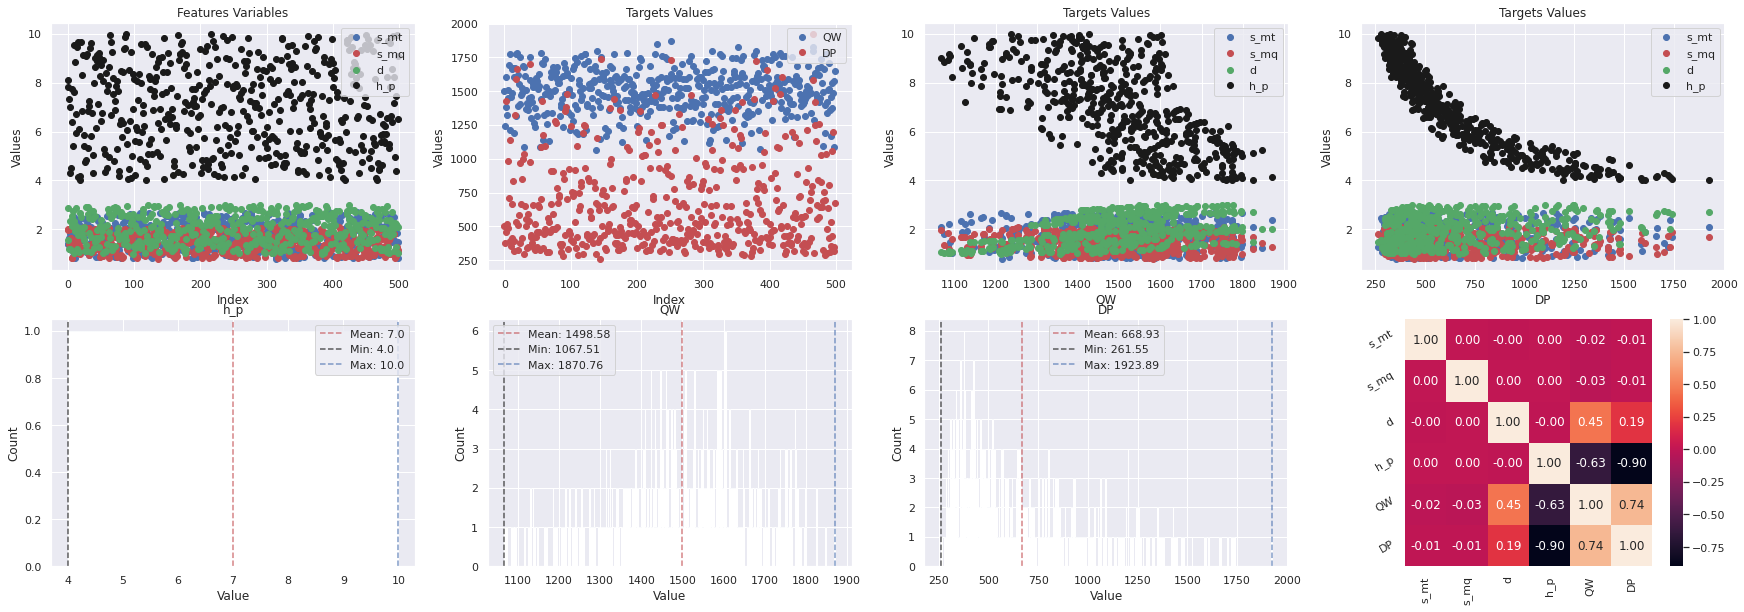

In [168]:
fig = plt.figure(figsize= (30, 10))
vals, names, xs = [],[],[]
for i, col in enumerate(df.columns):
    vals.append(df[col].values)
    names.append(col)
    xs.append(np.random.normal(i + 1, 0.04, df[col].values.shape[0]))

ax0 = fig.add_subplot(2,4, 1)
color = ["bo", "ro", 'go', "ko"]
for i in range(4):
    ax0.plot(df[features[0]], df[features[i+1]], color[i], label=features[i+1]) 
ax0.set_title('Features Variables')
plt.xlabel("Index", fontsize=12)                  
plt.ylabel("Values", fontsize=12)                 
ax0.legend()

ax1 = fig.add_subplot(2, 4, 2)
for i in range(2):
    ax1.plot(df[features[0]], df[features[i+5]], color[i], label=features[i+5]) 
ax1.set_title('Targets Values')    
plt.xlabel("Index", fontsize=12)      
plt.ylabel("Values", fontsize=12)     
ax1.legend()

ax2 = fig.add_subplot(2, 4, 3)
for i in range(4):
    ax2.plot(df[features[-2]], df[features[i+1]], color[i], label=features[i+1]) 
ax2.set_title('Targets Values')    
plt.xlabel("QW", fontsize=12)          
plt.ylabel("Values", fontsize=12)      
ax2.legend()

ax3 = fig.add_subplot(2, 4, 4)
for i in range(4):
    ax3.plot(df[features[-1]], df[features[i+1]], color[i], label=features[i+1]) 
ax3.set_title('Targets Values')    
plt.xlabel("DP", fontsize=12)               
plt.ylabel("Values", fontsize=12)           
ax3.legend()

ax4 = fig.add_subplot(2, 4, 5)
plot_hist(ax4, df[features[-3]], title=features[-3])

ax5 = fig.add_subplot(2, 4, 6)
plot_hist(ax5, df[features[-2]], title=features[-2])

ax6 = fig.add_subplot(2, 4, 7)
plot_hist(ax6, df[features[-1]], title=features[-1])

ax7 = fig.add_subplot(2, 4, 8)
corr_matrix = correlation_matrix(df)
#corr_matrix(ax7, df.drop(features[0], axis=1))
corr_matrix['QW'].sort_values(ascending=False)
a=sns.heatmap(corr_matrix,ax=ax7, square=True, annot=True, fmt='.2f', linecolor='white')          
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=30)   

# The correlation coefficient ranges from -1 to +1.
# When it is close to +1, this signifies that there is a strong positive correlation. So, we can see that there is a strong positive correlation between QW and DP and d.
# When it is clsoe to -1, it means that there is a strong negative correlation. 
corr_matrix

* Detect and remove outliers values. Thres is 3

In [174]:
#Z-Score
def detect_outliers_zscore(data, thres=3):
    '''ArithmeticError
    Outliers detectoion
        Thres=3 all points are out
    '''
    mean, std = np.mean(data), np.std(data)
    outliers = []
    index = []
    for i in range(len(data)):
        z_score = (data[i]-mean)/std
        if (np.abs(z_score) > thres):
            outliers.append(data[i])
            index.append(i)
    return outliers , index
sample = df['QW']
sample_outliers, index = detect_outliers_zscore(sample, 2)
print('Features [QW]', len(sample_outliers), sample_outliers)
print(len(index), index)

sample = df['DP']
sample_outliers, index = detect_outliers_zscore(sample, 2)
print('Features [DP]', len(sample_outliers), sample_outliers)
print(len(index), index)
df1 = df.drop(index)
print(len(df1))

Features [QW] 22 [1087.4367903920802, 1084.47129050687, 1141.90772686712, 1131.35664771877, 1067.50510952645, 1147.89462360464, 1171.64700437882, 1125.70573258117, 1136.7115747968598, 1847.2921502538504, 1165.6731614592, 1870.75781284086, 1130.61188518516, 1118.60322474407, 1139.9018872568, 1136.89247448952, 1116.77891875968, 1073.56537664933, 1164.83104971146, 1093.2421256634698, 1170.07602670515, 1090.43783254024]
22 [29, 54, 58, 67, 138, 145, 154, 177, 213, 230, 249, 251, 271, 309, 310, 334, 358, 386, 437, 481, 492, 498]
Features [DP] 29 [1429.79514477231, 1589.7048203135, 1666.4856242217402, 1697.93446236239, 1426.7508867459198, 1350.67092244226, 1379.74570899026, 1478.90684917129, 1740.50105692186, 1372.50166381455, 1445.6879558097698, 1358.30737209763, 1350.18874945223, 1468.84313819818, 1732.04407768787, 1473.29531874057, 1360.40038585852, 1363.12139303587, 1418.8683247345498, 1441.0311407478302, 1721.48854527805, 1658.88760180463, 1425.3776710190302, 1521.94259988133, 1477.5550

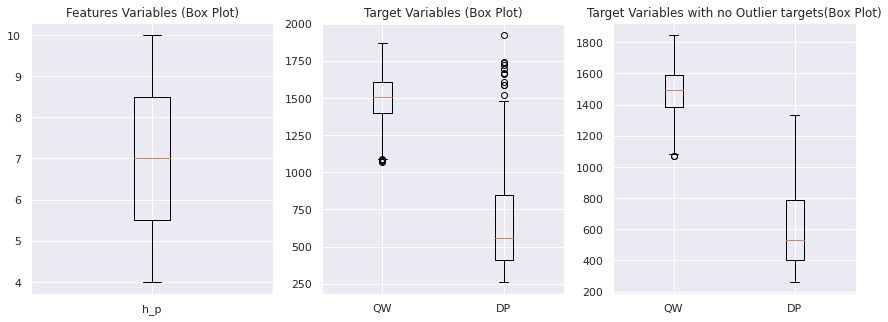

In [175]:
# Outlier Detection
fig1 = plt.figure(figsize=(20, 5))

ax10 = fig1.add_subplot(1,4, 1)
ax10.boxplot(x=[ df[features[4]]],labels=[features[4]]) #df[features[1]], df[features[2]], df[features[3]],
ax10.set_title('Features Variables (Box Plot)')
ax11 = fig1.add_subplot(1,4, 2)
#ax11.boxplot(x=[df[features[-2]]], labels=[features[-2]])
ax11.boxplot(x=[df[features[-2]], df[features[-1]]], labels=features[-2:])
ax11.set_title('Target Variables (Box Plot)')
ax12 = fig1.add_subplot(1,4, 3)
#ax11.boxplot(x=[df[features[-2]]], labels=[features[-2]])
ax12.boxplot(x=[df1[features[-2]], df1[features[-1]]], labels=features[-2:])
ax12.set_title('Target Variables with no Outlier targets(Box Plot)')

plt.show()
# So for DP All points above 1500, these are outliers. I will think what to do with this
# So for QW All points below 1100, these are outliers. I will think what to do with this

In [177]:
# Some statistics
df1[features[1:]].describe()

,s_mt,s_mq,d,h_p,QW,DP
count,471.0000,471.0000,471.0000,471.0000,471.0000,471.0000
mean,1.7507,1.4528,1.9824,7.1675,"1,484.8125",616.9427
std,0.5551,0.3787,0.5820,1.6481,157.0517,269.9780
min,0.8000,0.8000,1.0000,4.0361,"1,067.5051",261.5543
25%,1.2702,1.1243,1.4830,5.7615,"1,386.7401",401.6201
50%,1.7557,1.4565,1.9659,7.1743,"1,492.8855",528.5819
75%,2.2298,1.7809,2.4770,8.5872,"1,592.1076",785.9340
max,2.7000,2.1000,3.0000,10.0000,"1,847.2922","1,331.5403"


# 1.d. Choosing the model for target Function
Here's a step by step explanation:

1 $X = df[s\_mt, s\_mq, d, h\_p]$ Save 4 input features <br/>
 $y =  df[QW, DP]$ Save 2 targets

I analyse 4 basic model:
1. Linear Regression, which is not really suitable for h_p, <br/>
But, we will see the error and use it just to run an ordinary workhorse and compare. <br/>
Intuitively, Linear Regression might fit s_mt, s_mq and d, but it doesnt work with h_p. 
 Becouse h_p introduces maximum error in the result targets.
1. Nonlinear Regression.
1.

In [239]:
# Split source dataset into X and y categories. {Just for test}
# Attention to remove outlier values Choose df1 instead of df
X_df_origin = df1.drop(features[5:], axis=1).drop(features[0], axis=1)
y_df_origin = df1.drop(features[:5], axis=1)

1.d.1. Linear Regression

Each target is dependant on 4 variables:

$QW = s\_mt * w00 + s\_mq * w01 + d * w02 + h\_p * w03$

$DP = s\_mt * w10 + s\_mq * w11 + d * w12 + h\_p * w13$

1.d.2. Polinomial Regression

1.d.3. Decision Tree Regression

# Preprocessing data Z = (x-mu)/sigma

In [249]:

def lin_regression(X, y):
    #instantiate a model
    regression= LinearRegression()
    # train a model
    model = regression.fit(X, y)
    return model
df_train, df_test = train_test_split(df, test_size=0.20, random_state = 0)
df_train, df_test = df_train[features], df_test[features]
X_train, y_train = df_train.drop(features[5:], axis=1).drop(features[0], axis=1), df_train.drop(features[:5], axis=1)
X_test, y_test = df_test.drop(features[5:], axis=1).drop(features[0], axis=1), df_test.drop(features[:5], axis=1)

R2= []
RMS = []
#print ('Coefficients: ', lin_model.coef_)
#y_pred = lin_model.predict(X_test)
r2 =[]
rms = []

number_points = [100, 150, 200, 250, 300, 350, 400]
for i, num in enumerate(number_points):
    lin_model = lin_regression(X=X_train[0:num], y=y_train[0:num])
    y_pred = lin_model.predict(X_test)
    r2.append(r2_score(y_test, y_pred))
    rms.append(np.sqrt(mean_squared_error(y_test, y_pred)))    
R2 = r2
RMS = rms    
print(f"R2 Score value: {R2}, {np.max(R2)}") 
print(f"RMS Score value: {rms}")
print ('Coefficients: ', lin_model.coef_)


R2 Score value: [0.6958059904533097, 0.7081186408107707, 0.7159321575965513, 0.7129325643699352, 0.7102441596721321, 0.7130146414117405, 0.7137265533196908], 0.7159321575965513
RMS Score value: [121.62584894634529, 119.95756765206492, 118.36977406769029, 119.23394952732798, 120.00075935554592, 119.40761642735654, 119.59729780756088]
Coefficients:  [[-6.72393222e-02 -9.74956960e+00  1.21363183e+02 -6.11699862e+01]
 [ 7.45208204e-01 -1.53709537e+01  1.07833177e+02 -1.77859586e+02]]


In [250]:
poly= PolynomialFeatures(degree=3, include_bias=False)
poly_features = poly.fit_transform(X_df_origin)
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(poly_features, y_df_origin, test_size=0.5, random_state = 0)
r2 =[]
rms = []
for i, num in enumerate(number_points):
    poly_model = lin_regression(X=X_train_p[0:num], y=y_train_p[0:num])
    poly_y_pred = poly_model.predict(X_test_p)
    r2.append(r2_score(y_test_p, poly_y_pred))
    rms.append(np.sqrt(mean_squared_error(y_test_p, poly_y_pred)))

R2, RMS = np.vstack((R2,r2)), np.vstack((RMS,rms))
print(f"R2 Score value: {R2[-1]}, {np.max(R2[-1])}")    
print(f"RMS Score value: {RMS[-1]}, {np.min(R2[-1])}")        



R2 Score value: [0.75595552 0.80790646 0.82136427 0.82126934 0.82126934 0.82126934
 0.82126934], 0.8213642730606501
RMS Score value: [84.93783765 74.47465133 71.94369139 71.92181408 71.92181408 71.92181408
 71.92181408], 0.7559555242452864


In [251]:
def tree_regression(X, y):
    #instantiate a model
    regression= DecisionTreeRegressor(max_depth=6)
    # train a model
    model = regression.fit(X, y)
    return model
df_train, df_test = train_test_split(df, test_size=0.5, random_state = 0)
df_train, df_test = df_train[features], df_test[features]
X_train, y_train = df_train.drop(features[5:], axis=1).drop(features[0], axis=1), df_train.drop(features[:5], axis=1)
X_test, y_test = df_test.drop(features[5:], axis=1).drop(features[0], axis=1), df_test.drop(features[:5], axis=1)
r2 =[]
rms = []
for i, num in enumerate(number_points):
    tree_model = tree_regression(X=X_train[0:num], y=y_train[0:num])
    tree_y_pred = tree_model.predict(X_test)
    r2.append(r2_score(y_test, tree_y_pred))
    rms.append(np.sqrt(mean_squared_error(y_test, tree_y_pred)))
R2, RMS = np.vstack((R2,r2)), np.vstack((RMS,rms))
print(f"R2 Score value: {R2[-1]}, {np.max(R2[-1])}")  
print(f"RMS Score value: {RMS[-1]}, {np.min(R2[-1])}")  


R2 Score value: [0.67837919 0.68599818 0.68272604 0.71582664 0.72696052 0.71053771
 0.72273093], 0.7269605232301901
RMS Score value: [110.90778007 109.55514491 112.46983378 108.24344384 105.14997895
 108.90936959 107.0598971 ], 0.6783791940803104


In [252]:
from sklearn.ensemble import RandomForestRegressor
def forest_regression(X, y):
    #instantiate a model
    regression= RandomForestRegressor(max_depth=16)
    # train a model
    model = regression.fit(X, y)
    return model
df_train, df_test = train_test_split(df, test_size=0.5, random_state = 0)
df_train, df_test = df_train[features], df_test[features]
X_train, y_train = df_train.drop(features[5:], axis=1).drop(features[0], axis=1), df_train.drop(features[:5], axis=1)
X_test, y_test = df_test.drop(features[5:], axis=1).drop(features[0], axis=1), df_test.drop(features[:5], axis=1)
r2 =[]
rms = []
for i, num in enumerate(number_points):
    forest_model = forest_regression(X=X_train[0:num], y=y_train[0:num])
    forest_y_pred = forest_model.predict(X_test)
    r2.append(r2_score(y_test, forest_y_pred))
    rms.append(np.sqrt(mean_squared_error(y_test, forest_y_pred)))
R2, RMS = np.vstack((R2,r2)), np.vstack((RMS,rms))
print(f"R2 Score value: {R2[-1]}, {np.max(R2[-1])}")  
print(f"RMS Score value: {RMS[-1]}, {np.min(R2[-1])}")               


R2 Score value: [0.78195556 0.78850788 0.81246904 0.80675429 0.81979405 0.81175964
 0.8169157 ], 0.8197940472746801
RMS Score value: [89.97189368 89.92730512 85.1209345  86.23674899 83.2113097  84.71791305
 83.70069955], 0.7819555601174306


In [268]:
y_test.head(3)

,QW,DP
90,"1,709.5983",848.1734
254,"1,216.1829",384.4199
283,"1,276.7217",458.9912


(array([0.77952433, 0.79526353, 0.80926153, 0.81927023, 0.8120028 ,
        0.81064669, 0.81543409]),
 0.8192702257462412)

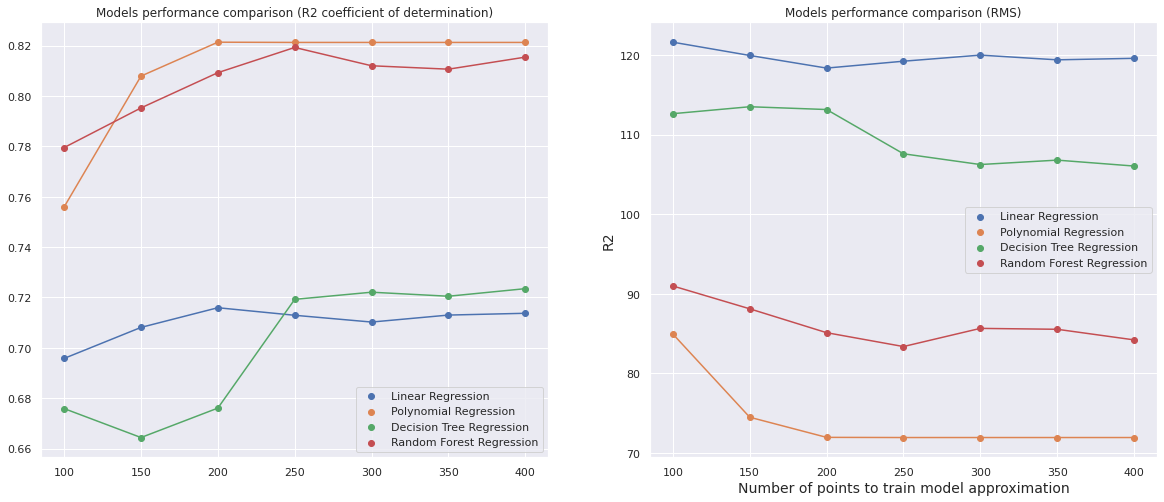

In [244]:
fig = plt.figure(figsize= (20, 8))
bar_width =1
ax0, ax1 = fig.add_subplot(1,2,1), fig.add_subplot(1,2,2)
ax0.set_title('Models performance comparison (R2 coefficient of determination)')
ax1.set_title('Models performance comparison (RMS)')
label = ['Linear Regression', 'Polynomial Regression', 'Decision Tree Regression', 'Random Forest Regression']
for i in range(4):
    ax0.scatter(number_points, R2[i], label=label[i])
    ax0.plot(number_points, R2[i])
    ax1.scatter(number_points, RMS[i], label=label[i])
    ax1.plot(number_points, RMS[i])

ax0.legend()
ax1.legend()
plt.xlabel("Number of points to train model approximation", fontsize=14)                  # set x axis label
plt.ylabel("R2", fontsize=14)                  # set x axis label
np.max(R2)
#ax0.bar(np.arange(1), r2[0], bar_width, alpha=0.8, label='Linear Regression')
#ax0.bar(np.arange(1)+bar_width, r2[1], bar_width, alpha=0.8,  label='Polynomial Regression')
#ax0.bar(np.arange(1)+bar_width*2, r2[2], bar_width, alpha=0.8,  label='Decision Tree Regression')
#ax0.bar(np.arange(1)+bar_width*3, r2[3], bar_width, alpha=0.8,  label='Random Forest Regression')
#ax0.legend()
#ax1 = fig.add_subplot(1,2,2)
#ax1.set_title('Models performance comparison')
#ax1.bar(np.arange(1), rms[0], bar_width, alpha=0.8, label='Linear Regression')
#ax1.bar(np.arange(1)+bar_width, rms[1], bar_width, alpha=0.8,  label='Polynomial Regression')
#ax1.bar(np.arange(1)+bar_width*2, rms[2], bar_width, alpha=0.8,  label='Decision Tree Regression')
#ax1.bar(np.arange(1)+bar_width*3, rms[3], bar_width, alpha=0.8,  label='Random Forest Regression')
#ax1.legend()
R2[3], np.max(R2[3])

# Test with a custom values

In [276]:
a = 0.8
b = 0.8 
d = 1.0
c = 4
C = np.asarray([a, b, c, d])
out = forest_model.predict(C.reshape(1, -1))
out

array([[1678.79961575, 1527.71457073]])